<b>Audio and Music Processing Lab - Module 2</b><br>Gonzalo Nieto<br>Morgan Buisson<br>9.03.2021
## AMPLab2 - Ethnomusicology research
### Not retrieved annotations
The aim of this notebook is to find the TextExpression in the scores not retrieved as poems for all recordings. These TextExpressions were not detected as lyrics, and the ones that are repeated are possibly instrumental names.

It uses pre-processed data with the ```Pre-processing.ipynb``` notebook. Note that there might be paths that need to be changed. 

In [1]:
from music21 import *
import json
import pickle
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

Count how many TextExpressions retrieved are not names of poems. They were preprocessed as 'Not Retrieved/Instrumental' and they include intrumental names (like 'Mshalia', 'Tawshiya') as well as other score notations. The annotation is the first one in the list (index 0) for each nawba.

In [6]:
instrumentals_names = {}
for root, dirs, files in os.walk("./preprocessed_nawbas", topdown=False):
   for name in files:
       if name != '.DS_Store':
            filename = os.path.join(root, name)
            mbid = name[:-4]
            with open(filename, "rb") as f:
                nawba = pickle.load(f)

            for i in range(len(nawba)):
                if nawba[i][1] == 'Not Retrieved/Instrumental':
                    instrumentals_names[nawba[i][0]] = instrumentals_names.get(nawba[i][0],0)+1

# change the name of an empty string to something interpretable
instrumentals_names['<empty string>'] = instrumentals_names.pop('')

Plot an ordered list.

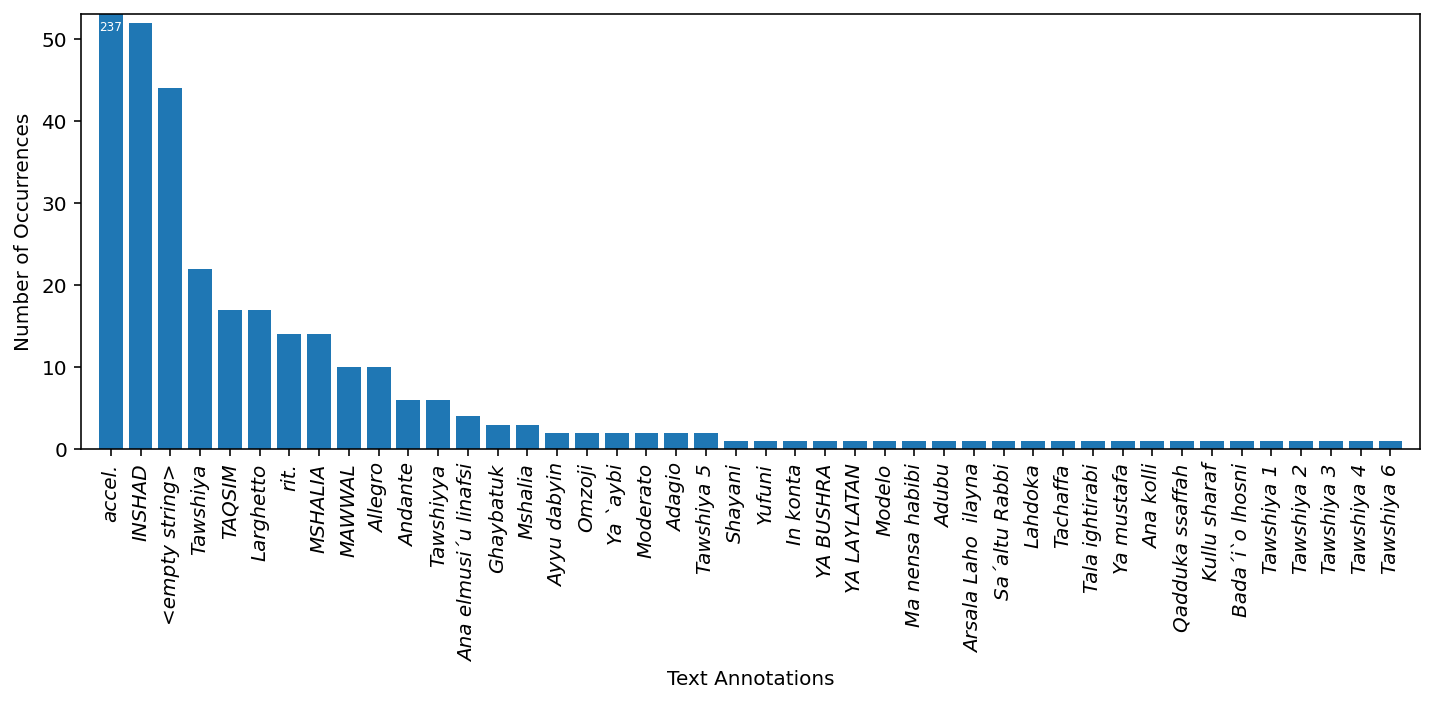

In [7]:
# Ordered dictionary
sorted_instrumentals_names = dict(sorted(instrumentals_names.items(), key=lambda item: item[1], reverse=True))

# Plot
x = list(sorted_instrumentals_names.keys())
y = list(sorted_instrumentals_names.values())

plt.figure(figsize=(12, 4))
plt.bar(x, y)
plt.xticks(range(len(x)), x, rotation='vertical', style='italic')
plt.ylim(0, max(y[1:])+1)
plt.text(-0.4, max(y[1:])-1, f'{y[0]}', fontsize=6, color='white')
#plt.text(0.75, max(y[1:])-2, f'{y[1]}', fontsize=6, color='white')
plt.xlim(-1, len(x))
plt.xlabel('Text Annotations')
plt.ylabel('Number of Occurrences')
plt.savefig('./results/preprocessing/instrumentals_names_occurences.png', bbox_inches='tight')

Save the ranking as a csv table.

In [8]:
with open('./results/instrumentals_names_occurences.csv', 'w') as f:  
    w = csv.DictWriter(f, sorted_instrumentals_names.keys())
    w.writeheader()
    w.writerow(sorted_instrumentals_names)